# Data cleaning

In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# 加载数据
file_path = "original_data.csv"
df = pd.read_csv(file_path)

print(df.head())





    Country Name Country Code  \
0  United States          USA   
1  United States          USA   
2  United States          USA   
3         Canada          CAN   
4         Canada          CAN   

                                         Series Name        Series Code  \
0  Ratio of female to male labor force participat...  SL.TLF.CACT.FM.ZS   
1  Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
2  Labor force participation rate, total (% of to...     SL.TLF.ACTI.ZS   
3  Ratio of female to male labor force participat...  SL.TLF.CACT.FM.ZS   
4  Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   

   1991 [YR1991]  1992 [YR1992]  1993 [YR1993]  1994 [YR1994]  1995 [YR1995]  \
0      75.189205      75.731187      76.309203      78.001061      78.402472   
1       6.800000       7.500000       6.900000       6.120000       5.650000   
2      74.712000      75.080000      75.052000      75.252000      75.438000   
3      77.865302      78.31067

In [2]:
# 保留数据的 1-7 行（Python 中索引从 0 开始）
df_subset = df.iloc[:7]

# 查看数据结构
print(df_subset.head())


    Country Name Country Code  \
0  United States          USA   
1  United States          USA   
2  United States          USA   
3         Canada          CAN   
4         Canada          CAN   

                                         Series Name        Series Code  \
0  Ratio of female to male labor force participat...  SL.TLF.CACT.FM.ZS   
1  Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
2  Labor force participation rate, total (% of to...     SL.TLF.ACTI.ZS   
3  Ratio of female to male labor force participat...  SL.TLF.CACT.FM.ZS   
4  Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   

   1991 [YR1991]  1992 [YR1992]  1993 [YR1993]  1994 [YR1994]  1995 [YR1995]  \
0      75.189205      75.731187      76.309203      78.001061      78.402472   
1       6.800000       7.500000       6.900000       6.120000       5.650000   
2      74.712000      75.080000      75.052000      75.252000      75.438000   
3      77.865302      78.31067

In [3]:
# 转换为长表格式（Long Format）
df_long = pd.melt(df_subset, 
                  id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                  var_name='Year', 
                  value_name='Value')

# 提取年份并转换为整数
df_long['Year'] = df_long['Year'].str.extract(r'(\d{4})').astype(int)

# 处理缺失值（可选）：删除缺失值行
df_long.dropna(inplace=True)


#-----------------------------------------------------------------------------------------------------------------#


# 重新整理数据，使其符合 国家-年份-多个变量 的格式

# 透视数据，使每个 "Series Name" 作为单独的列
df_pivot = df_long.pivot_table(index=['Country Name', 'Country Code', 'Year'], 
                               columns='Series Name', 
                               values='Value').reset_index()

# 重置列名格式（去掉多层索引）
df_pivot.columns.name = None


# 将 DataFrame 导出为 CSV 文件，不包含索引
df_pivot.to_csv("working_data.csv", index=False)

working_df = df_pivot.copy()

# 清理列名（简化名称）
working_df.rename(columns={
    'Country Name': 'Country',
    'Country Code': 'Code',
    'Year': 'Year',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)': 'Labor_Participation',
    'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)': 'Female_Male_Ratio',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment_Rate'
}, inplace=True)

# 确保 Year 为 datetime 类型
working_df['Year'] = pd.to_datetime(working_df['Year'], format='%Y')
working_df['Year'] = working_df['Year'].dt.year
working_df = pd.DataFrame(working_df)
working_df.to_csv("working_data.csv", index=False)
working_df


,Country,Code,Year,Labor_Participation,Female_Male_Ratio,Unemployment_Rate
0,Canada,CAN,1991,76.618,77.865302,10.32
1,Canada,CAN,1992,75.774,78.310675,11.20
2,Canada,CAN,1993,75.536,78.652298,11.38
3,Canada,CAN,1994,75.370,78.687224,10.40
4,Canada,CAN,1995,75.138,79.327288,9.49
...,...,...,...,...,...,...
59,United States,USA,2018,72.401,82.538825,3.90
60,United States,USA,2019,72.865,82.972330,3.67
61,United States,USA,2020,71.720,82.990643,8.05
62,United States,USA,2021,72.073,82.913951,5.35


# EDA

In [4]:
# 重新读取 working_df

# 分割 USA 和 CAN 数据
usa_df = working_df[working_df['Code'] == 'USA'].copy()
can_df = working_df[working_df['Code'] == 'CAN'].copy()

usa_df.to_csv("usa_df.csv", index=False)
can_df.to_csv("can_df.csv", index=False)



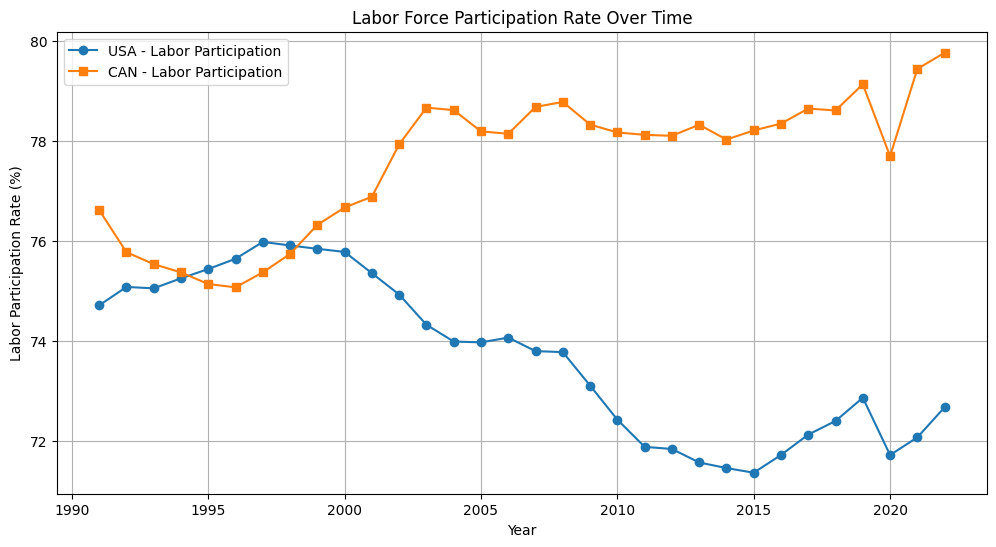

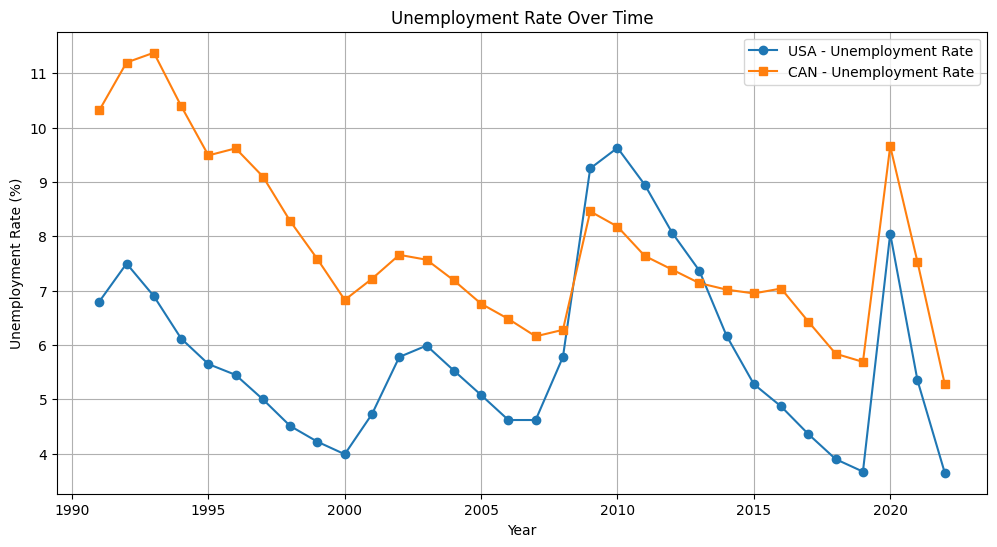

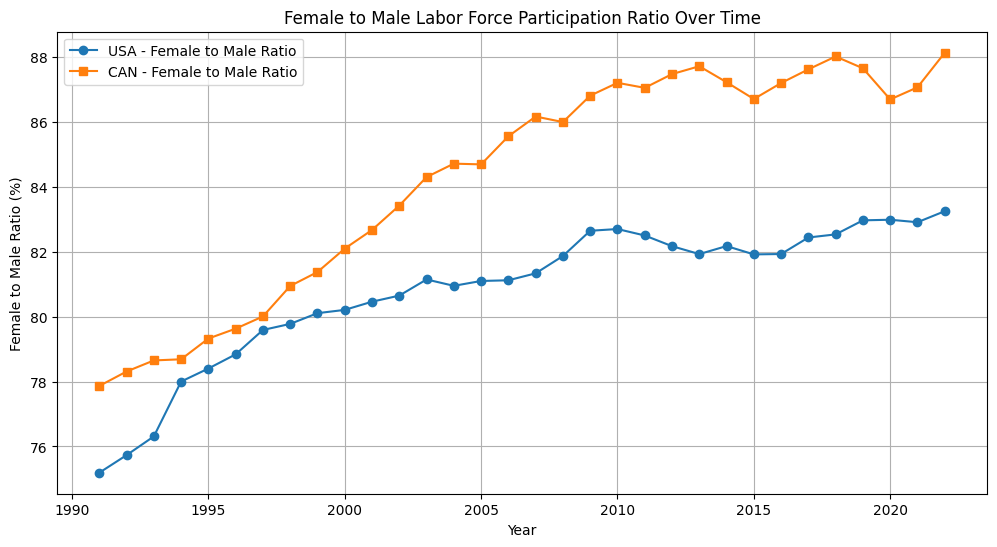

In [6]:
import matplotlib.pyplot as plt

# 设置图表大小
plt.figure(figsize=(12, 6))

# 绘制劳动力参与率时间序列
plt.plot(usa_df['Year'], usa_df['Labor_Participation'], label='USA - Labor Participation', linestyle='-', marker='o')
plt.plot(can_df['Year'], can_df['Labor_Participation'], label='CAN - Labor Participation', linestyle='-', marker='s')

# 添加标题和标签
plt.title('Labor Force Participation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Labor Participation Rate (%)')
plt.legend()
plt.grid(True)

# 显示图表
plt.show()

# 设置图表大小
plt.figure(figsize=(12, 6))

# 绘制失业率时间序列
plt.plot(usa_df['Year'], usa_df['Unemployment_Rate'], label='USA - Unemployment Rate', linestyle='-', marker='o')
plt.plot(can_df['Year'], can_df['Unemployment_Rate'], label='CAN - Unemployment Rate', linestyle='-', marker='s')

# 添加标题和标签
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)

# 显示图表
plt.show()

# 设置图表大小
plt.figure(figsize=(12, 6))

# 绘制 Female_Male_Ratio 时间序列
plt.plot(usa_df['Year'], usa_df['Female_Male_Ratio'], label='USA - Female to Male Ratio', linestyle='-', marker='o')
plt.plot(can_df['Year'], can_df['Female_Male_Ratio'], label='CAN - Female to Male Ratio', linestyle='-', marker='s')

# 添加标题和标签
plt.title('Female to Male Labor Force Participation Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Female to Male Ratio (%)')
plt.legend()
plt.grid(True)

# 显示图表
plt.show()



In [7]:
# 处理USA数据
for col in ['Unemployment_Rate', 'Labor_Participation']:
    # 获取2019年和2022年的值
    val_2019 = usa_df.loc[usa_df['Year'] == 2019, col].values[0]
    val_2022 = usa_df.loc[usa_df['Year'] == 2022, col].values[0]
    
    # 计算等量趋势变化值
    step = (val_2022 - val_2019) / 3  # 2020 和 2021 需要填充
    
    # 替换2020和2021的数据
    usa_df.loc[usa_df['Year'] == 2020, col] = val_2019 + step
    usa_df.loc[usa_df['Year'] == 2021, col] = val_2019 + 2 * step

# 处理CAN数据
for col in ['Unemployment_Rate', 'Labor_Participation']:
    # 获取2019年和2022年的值
    val_2019 = can_df.loc[can_df['Year'] == 2019, col].values[0]
    val_2022 = can_df.loc[can_df['Year'] == 2022, col].values[0]
    
    # 计算等量趋势变化值
    step = (val_2022 - val_2019) / 3  # 2020 和 2021 需要填充
    
    # 替换2020和2021的数据
    can_df.loc[can_df['Year'] == 2020, col] = val_2019 + step
    can_df.loc[can_df['Year'] == 2021, col] = val_2019 + 2 * step

usa_df.to_csv("usa_df.csv", index=False)
can_df.to_csv("can_df.csv", index=False)


# Modeling & Prediction

In [8]:
# 定义训练集和测试集的分割年份
train_end_year = 2019

# 分割 USA 数据集
usa_train = usa_df[usa_df['Year'] <= train_end_year]
usa_test = usa_df[usa_df['Year'] > train_end_year]

# 分割 CAN 数据集
can_train = can_df[can_df['Year'] <= train_end_year]
can_test = can_df[can_df['Year'] > train_end_year]




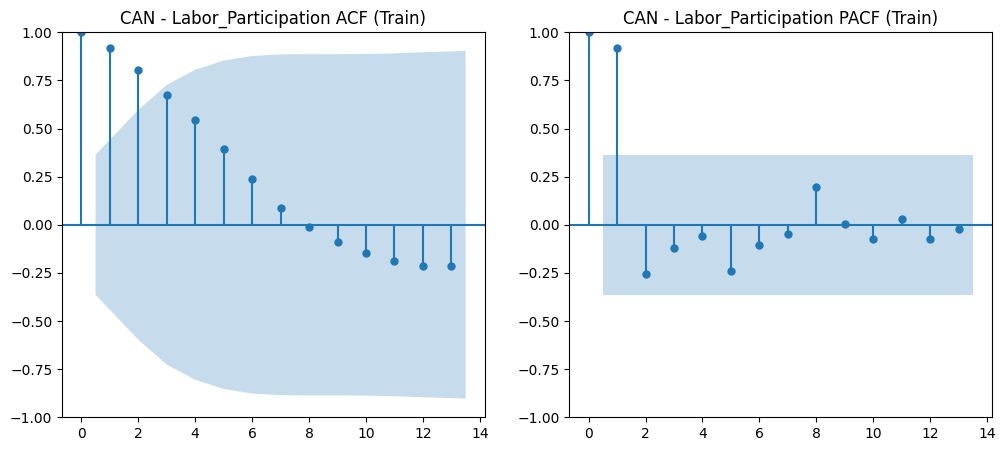

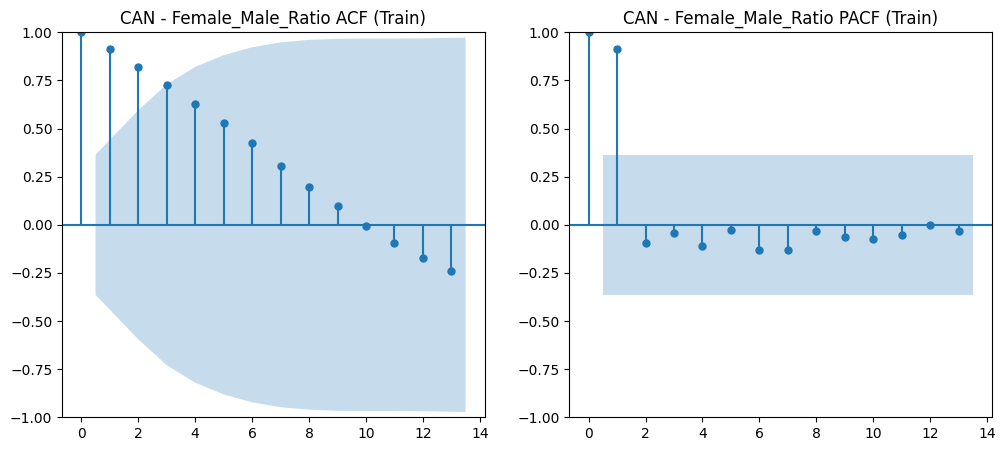

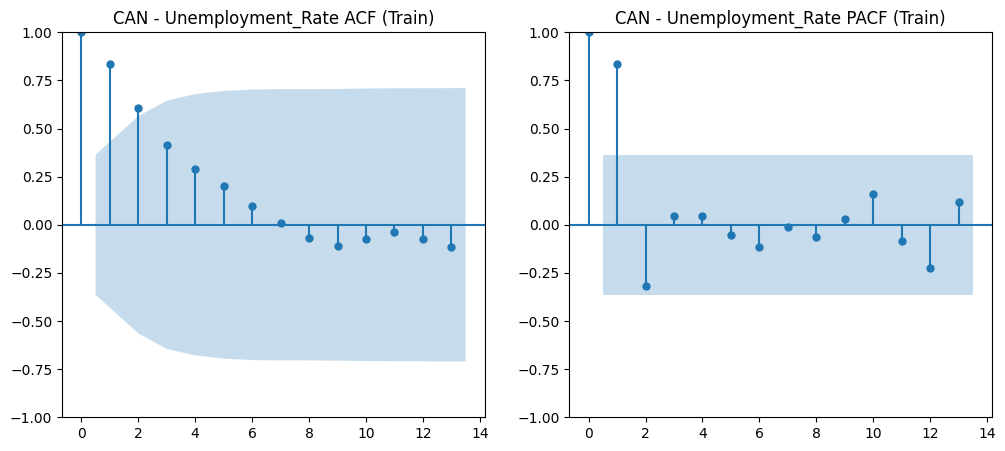

{'CAN': {'Labor_Participation': {'ADF Statistic': -0.35444136747827487,
   'p-value': 0.917432063215081,
   'Critical Values': {'1%': -3.6889256286443146,
    '5%': -2.9719894897959187,
    '10%': -2.6252957653061224}},
  'Female_Male_Ratio': {'ADF Statistic': -2.2041378728601217,
   'p-value': 0.2047470770335581,
   'Critical Values': {'1%': -3.7112123008648155,
    '5%': -2.981246804733728,
    '10%': -2.6300945562130176}},
  'Unemployment_Rate': {'ADF Statistic': -2.288082271985366,
   'p-value': 0.1758404897763985,
   'Critical Values': {'1%': -3.6996079738860943,
    '5%': -2.9764303469999494,
    '10%': -2.627601001371742}}}}

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 进行 ACF、PACF 和 ADF 测试（仅训练集）
train_results = {}
for country, df in [("USA", usa_train), ("CAN", can_train)]:
    train_results[country] = {}
    for var in ["Labor_Participation", "Female_Male_Ratio", "Unemployment_Rate"]:
        series = df[var].dropna()  # 确保数据无缺失值
        max_lag = min(len(series) // 2 - 1, 15)  # 限制最大滞后阶数

        # ADF（单位根）检验
        adf_test = adfuller(series)
        adf_result = {
            "ADF Statistic": adf_test[0],
            "p-value": adf_test[1],
            "Critical Values": adf_test[4]
        }
        train_results[country][var] = adf_result

        # ACF 和 PACF 图表
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        plot_acf(series, ax=axes[0], lags=max_lag)
        plot_pacf(series, ax=axes[1], lags=max_lag, method="ywm")  # 解决FutureWarning
        axes[0].set_title(f"{country} - {var} ACF (Train)")
        axes[1].set_title(f"{country} - {var} PACF (Train)")
        plt.show()


train_results 

In [ ]:
# 需要进行一阶差分的变量
diff_variables = {
    "CAN": ["Labor_Participation", "Female_Male_Ratio", "Unemployment_Rate"]
}

# 进行一阶差分
for country, df in [("USA", usa_train), ("CAN", can_train)]:
    for var in diff_variables[country]:
        df[f"{var}_diff"] = df[var].diff()  # 计算一阶差分

# 重新进行 ADF 检验
diff_train_results = {}
for country, df in [("USA", usa_train), ("CAN", can_train)]:
    diff_train_results[country] = {}
    for var in diff_variables[country]:
        series_diff = df[f"{var}_diff"].dropna()  # 确保无缺失值

        # ADF（单位根）检验
        adf_test = adfuller(series_diff)
        adf_result = {
            "ADF Statistic": adf_test[0],
            "p-value": adf_test[1],
            "Critical Values": adf_test[4]
        }
        diff_train_results[country][f"{var}_diff"] = adf_result
diff_train_results

KeyError: 'USA'

In [16]:
# 需要进行二阶差分的变量
diff2_variables = {
    "USA": ["Labor_Participation"],
    "CAN": ["Female_Male_Ratio"]
}

# 进行二阶差分
for country, df in [("USA", usa_train), ("CAN", can_train)]:
    for var in diff2_variables[country]:
        df[f"{var}_diff2"] = df[f"{var}_diff"].diff()  # 计算二阶差分

# 重新进行 ADF 检验（二阶差分）
diff2_train_results = {}
for country, df in [("USA", usa_train), ("CAN", can_train)]:
    diff2_train_results[country] = {}
    for var in diff2_variables[country]:
        series_diff2 = df[f"{var}_diff2"].dropna()  # 确保无缺失值

        # ADF（单位根）检验
        adf_test = adfuller(series_diff2)
        adf_result = {
            "ADF Statistic": adf_test[0],
            "p-value": adf_test[1],
            "Critical Values": adf_test[4]
        }
        diff2_train_results[country][f"{var}_diff2"] = adf_result

diff2_train_results

C:\Users\weika\AppData\Local\Temp\ipykernel_104760\4271471337.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{var}_diff2"] = df[f"{var}_diff"].diff()  # 计算二阶差分


{'USA': {'Labor_Participation_diff2': {'ADF Statistic': -6.4107033662383595,
   'p-value': 1.8940073866555362e-08,
   'Critical Values': {'1%': -3.7112123008648155,
    '5%': -2.981246804733728,
    '10%': -2.6300945562130176}}},
 'CAN': {'Female_Male_Ratio_diff2': {'ADF Statistic': -7.762025291040346,
   'p-value': 9.399412431251363e-12,
   'Critical Values': {'1%': -3.7238633119999998,
    '5%': -2.98648896,
    '10%': -2.6328004}}}}

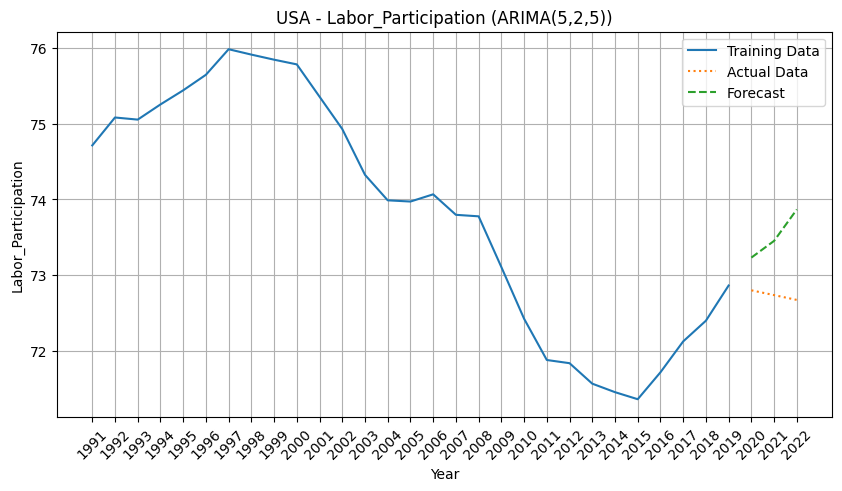

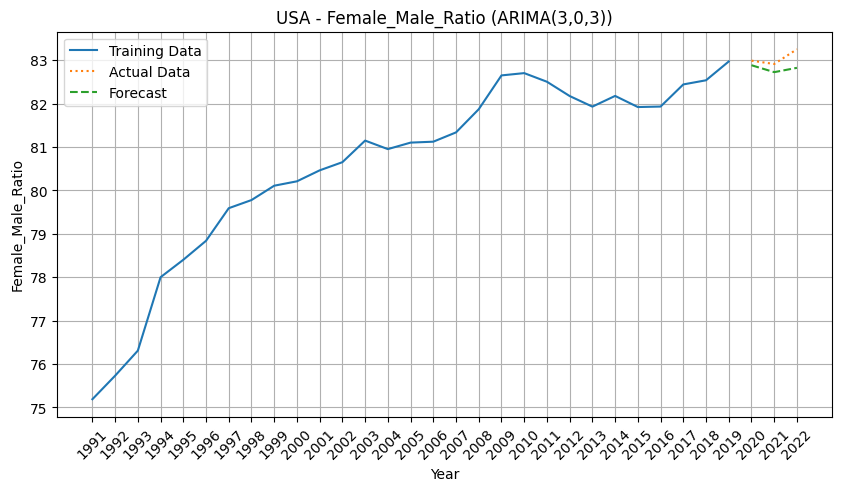

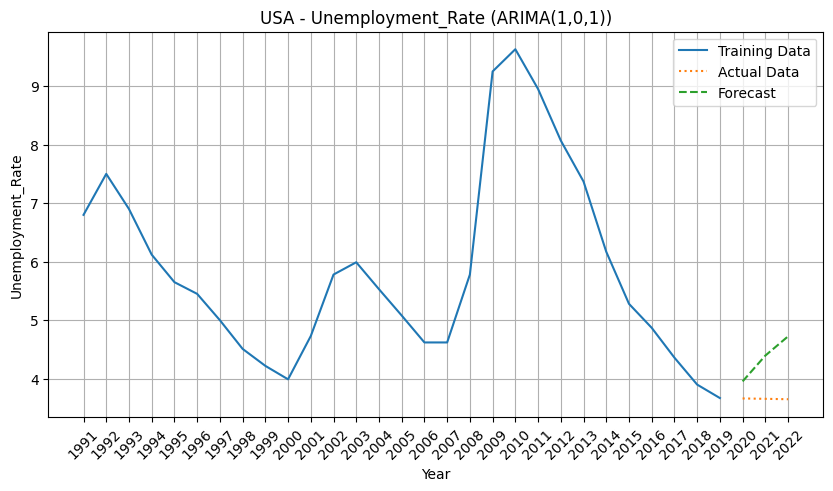

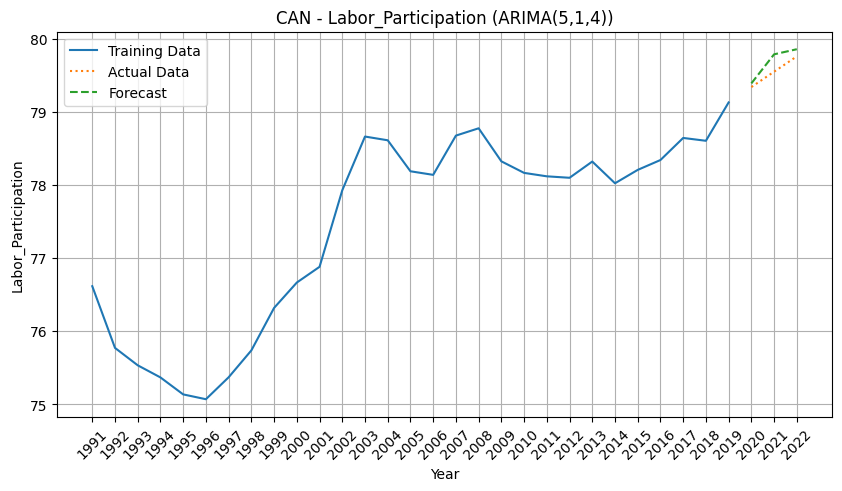

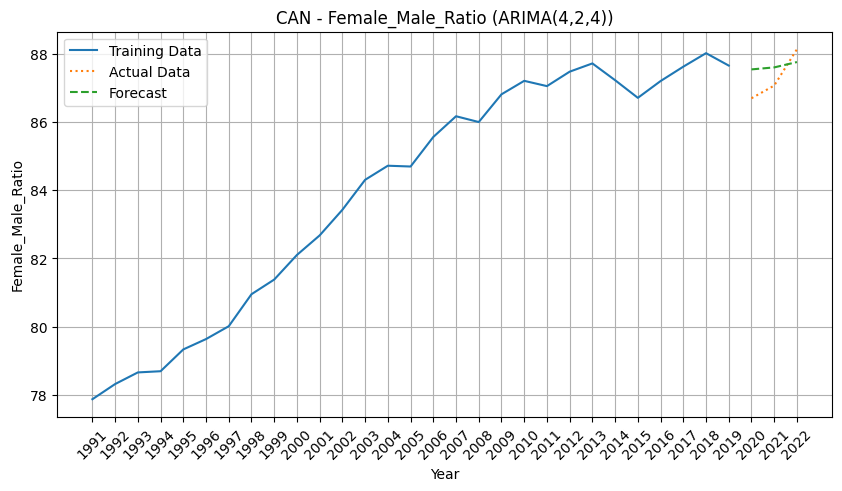

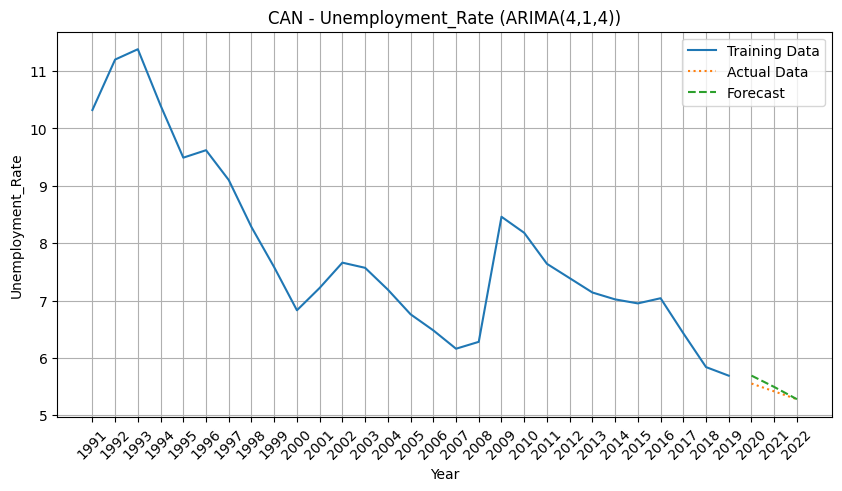

{'USA': {'Labor_Participation': {'p': 5, 'd': 2, 'q': 5, 'AIC': 21.2512454748532}, 'Female_Male_Ratio': {'p': 3, 'd': 0, 'q': 3, 'AIC': 47.66227356665989}, 'Unemployment_Rate': {'p': 1, 'd': 0, 'q': 1, 'AIC': 72.57030012478758}}, 'CAN': {'Labor_Participation': {'p': 5, 'd': 1, 'q': 4, 'AIC': 32.7517764174104}, 'Female_Male_Ratio': {'p': 4, 'd': 2, 'q': 4, 'AIC': 38.03107185072217}, 'Unemployment_Rate': {'p': 4, 'd': 1, 'q': 4, 'AIC': 66.85596890204327}}}


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)



# 手动设定 p, d, q 值
params = {
    "USA": {
        "Labor_Participation": (5, 2, 5),  # (p, d, q)
        "Female_Male_Ratio": (3, 0, 3),
        "Unemployment_Rate": (1, 0, 1),
    },
    "CAN": {
        "Labor_Participation": (5, 1, 4),
        "Female_Male_Ratio": (4, 2, 4),
        "Unemployment_Rate": (4, 1, 4),
    }
}

# 训练 ARIMA 模型，计算 AIC 并进行预测可视化
results = {}
for country, train_df, test_df in [("USA", usa_train, usa_test), ("CAN", can_train, can_test)]:
    results[country] = {}
    for var in params[country]:
        p, d, q = params[country][var]

        try:
            model = sm.tsa.ARIMA(train_df[var], order=(p, d, q))
            fitted_model = model.fit()
            aic = fitted_model.aic

            results[country][var] = {"p": p, "d": d, "q": q, "AIC": aic}

            # 预测未来 7 年 (2016-2022)
            forecast = fitted_model.forecast(steps=len(test_df))

            # 画出预测图
            plt.figure(figsize=(10, 5))
            plt.plot(train_df['Year'], train_df[var], label="Training Data")
            plt.plot(test_df['Year'], test_df[var], label="Actual Data", linestyle="dotted")
            plt.plot(test_df['Year'], forecast, label="Forecast", linestyle="dashed")
            plt.title(f"{country} - {var} (ARIMA({p},{d},{q}))")
            plt.xticks(train_df['Year'].tolist() + test_df['Year'].tolist(), rotation=45)  # 确保所有年份可见
            plt.xlabel("Year")
            plt.ylabel(var)
            plt.legend()
            plt.grid(True)
            plt.show()

        except Exception as e:
            results[country][var] = {"Error": str(e)}

print(results)

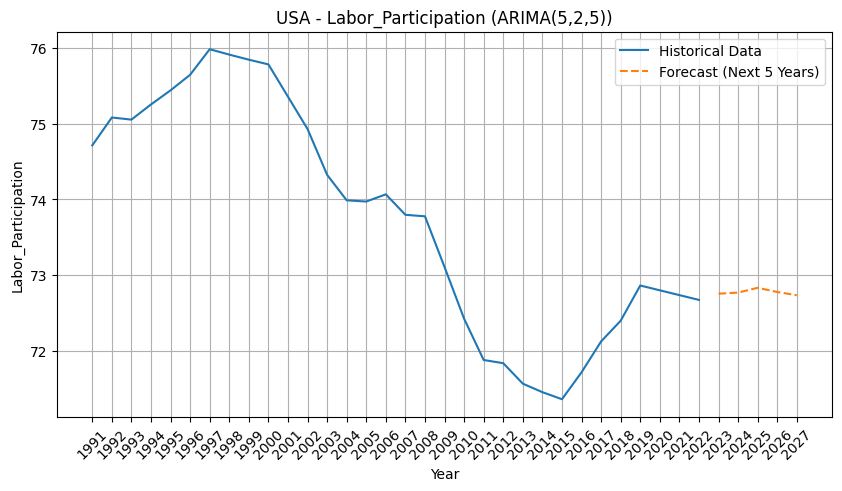

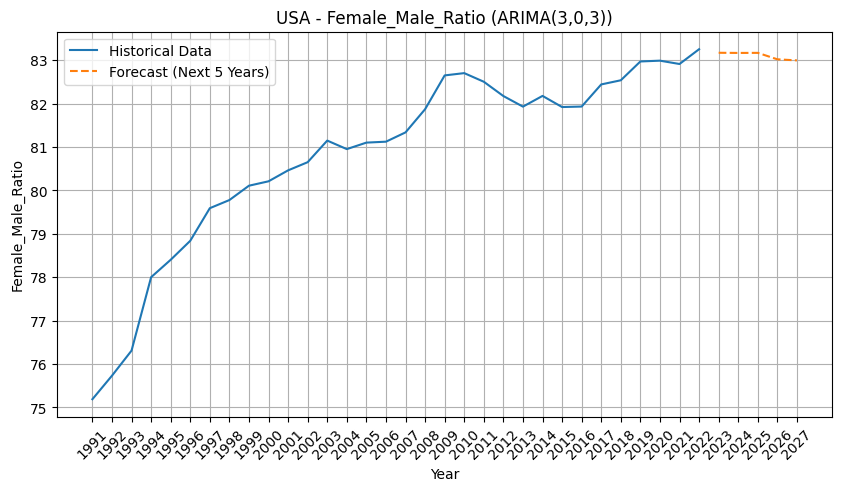

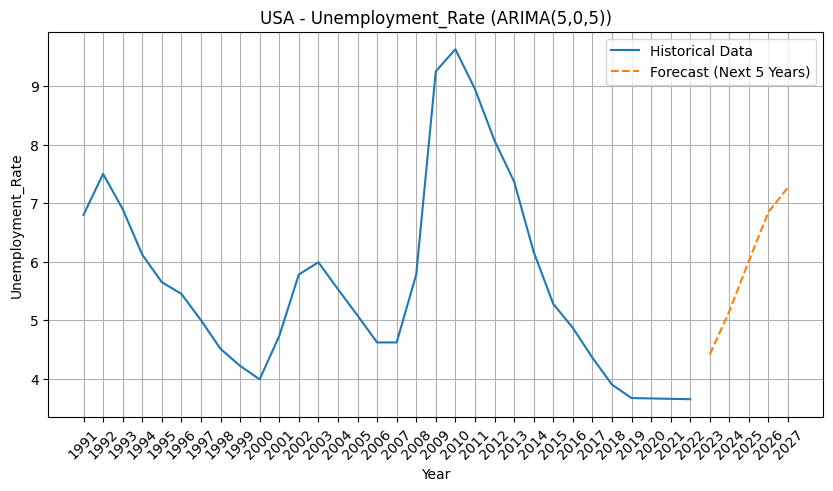

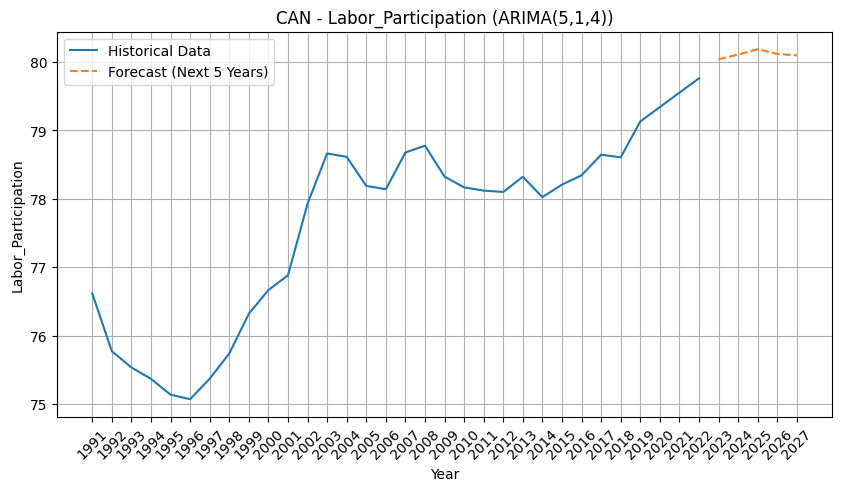

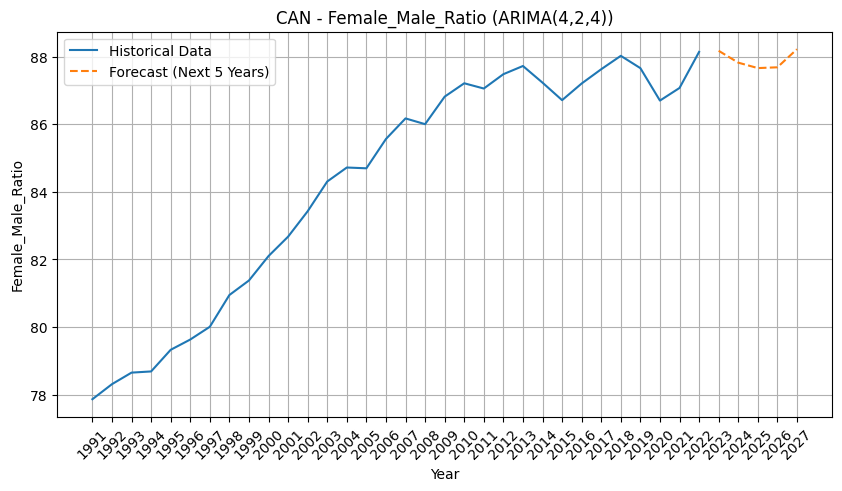

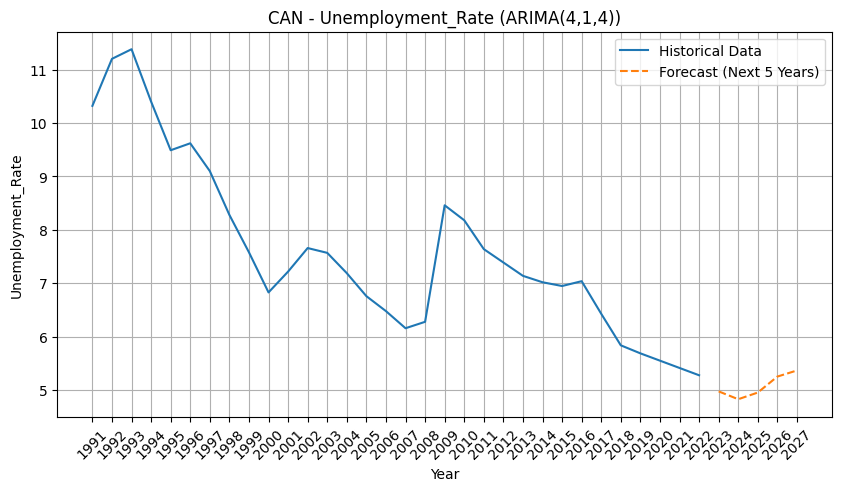

,USA,CAN
Labor_Participation,"[72.75730590653254, 72.77147390514183, 72.8347...","[80.04157261942512, 80.10903157614092, 80.1876..."
Female_Male_Ratio,"[83.17258241570035, 83.16887716317542, 83.1706...","[88.1743502035072, 87.82364993029486, 87.66237..."
Unemployment_Rate,"[4.414547996935853, 5.152985936591323, 6.01564...","[4.9781702373708345, 4.8317904317182805, 4.956..."


In [25]:

# 设定未来预测年数
future_years = 5
last_year_usa = usa_df["Year"].max()
last_year_can = can_df["Year"].max()
future_years_range_usa = list(range(last_year_usa + 1, last_year_usa + 1 + future_years))
future_years_range_can = list(range(last_year_can + 1, last_year_can + 1 + future_years))

# 设定 ARIMA 参数
params = {
    "USA": {
        "Labor_Participation": (5, 2, 5),
        "Female_Male_Ratio": (3, 0, 3),
        "Unemployment_Rate": (5, 0, 5),
    },
    "CAN": {
        "Labor_Participation": (5, 1, 4),
        "Female_Male_Ratio": (4, 2, 4),
        "Unemployment_Rate": (4, 1, 4),
    }
}

# 训练 ARIMA 模型并预测未来 5 年
forecast_results = {}
for country, df, future_years_range in [("USA", usa_df, future_years_range_usa), ("CAN", can_df, future_years_range_can)]:
    forecast_results[country] = {}
    for var in params[country]:
        p, d, q = params[country][var]

        try:
            model = sm.tsa.ARIMA(df[var], order=(p, d, q))
            fitted_model = model.fit()

            # 预测未来 5 年
            forecast = fitted_model.forecast(steps=future_years)

            # 画出预测图
            plt.figure(figsize=(10, 5))
            plt.plot(df["Year"], df[var], label="Historical Data")
            plt.plot(future_years_range, forecast, label="Forecast (Next 5 Years)", linestyle="dashed")
            plt.title(f"{country} - {var} (ARIMA({p},{d},{q}))")
            plt.xlabel("Year")
            plt.ylabel(var)
            plt.xticks(list(df["Year"]) + future_years_range, rotation=45)
            plt.legend()
            plt.grid(True)
            plt.show()

            # 存储预测结果
            forecast_results[country][var] = forecast.tolist()

        except Exception as e:
            forecast_results[country][var] = {"Error": str(e)}

dataframe=pd.DataFrame(forecast_results)
dataframe